In [1]:
!pip install scipy
!pip install matplotlib
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from data_handling.data_loader import load_data
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [73]:
df = load_data('data/hourly/merged_data.csv', num_rows=1000).iloc()[-1000:]
df

,Estimated Wind Power [MW] (current),Estimated Wind Power [MW] (dayahead),Estimated Wind Power [MW] (intraday),Wind Power [MW] (Net commercial settlement),Wind Power [MW] (Net control),Wind Power [MW] (Gross control),Wind Power [MW] (Gross control 1p),Precipitation [mm],Temperature [°C],Average Temperature [°C],...,Average Wind Direction [°],Ground Temperature 5cm [°C],Ground Temperature 10cm [°C],Ground Temperature 20cm [°C],Ground Temperature 50cm [°C],Ground Temperature 100cm [°C],Close to Ground Min Temperature [°C],Water Temperature [°C],Weather Code X,Weather Code Y
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,50.689,49.709,50.689,49.296,48.750,NaN,NaN,0.0,-1.46,-1.62,...,204.4,1.75,2.45,3.50,5.45,7.35,-6.25,NaN,NaN,NaN
2021-01-01 02:00:00,43.884,43.544,43.884,40.380,40.008,NaN,NaN,0.0,-1.24,-1.40,...,193.6,1.70,2.25,3.35,5.40,7.35,-6.05,NaN,NaN,NaN
2021-01-01 03:00:00,34.798,35.752,34.798,25.718,25.936,NaN,NaN,0.0,-1.22,-1.20,...,183.8,1.55,2.25,3.35,5.45,7.40,-4.30,NaN,NaN,NaN
2021-01-01 04:00:00,28.185,31.251,28.185,16.682,17.075,NaN,NaN,0.0,-1.84,-1.40,...,150.0,1.45,2.20,3.30,5.45,7.35,-3.95,NaN,NaN,NaN
2021-01-01 05:00:00,23.733,29.058,23.733,20.212,20.959,NaN,NaN,0.0,-2.38,-2.08,...,155.4,1.45,2.10,3.20,5.40,7.35,-3.85,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11 12:00:00,303.880,305.532,303.880,294.728,290.597,NaN,NaN,0.0,-3.92,-4.18,...,325.4,1.30,1.80,2.70,4.50,6.05,-3.90,NaN,NaN,NaN
2021-02-11 13:00:00,303.212,305.230,303.212,300.267,295.860,NaN,NaN,0.0,-3.38,-3.64,...,326.4,1.30,1.75,2.70,4.50,6.00,-3.35,NaN,NaN,NaN
2021-02-11 14:00:00,302.650,303.759,302.650,298.447,294.085,NaN,NaN,0.0,-3.38,-3.42,...,323.8,1.25,1.65,2.55,4.50,6.05,-3.45,NaN,NaN,NaN


In [4]:
df.columns

Index(['Estimated Wind Power [MW] (current)',
       'Estimated Wind Power [MW] (dayahead)',
       'Estimated Wind Power [MW] (intraday)',
       'Wind Power [MW] (Net commercial settlement)',
       'Wind Power [MW] (Net control)', 'Wind Power [MW] (Gross control)',
       'Wind Power [MW] (Gross control 1p)', 'Precipitation [mm]',
       'Temperature [°C]', 'Average Temperature [°C]', 'Min Temperature [°C]',
       'Max Temperature [°C]', 'Visibility [m]', 'Pressure [hPa]',
       'Humidity [%]', 'Average Gamma Radiation [nSv/h]',
       'Average Solar Radiation [J/cm^2]', 'UV Radiation Sum [MED]',
       'Wind Speed [m/s]', 'Wind Direction [°]', 'Max Wind Speed [m/s]',
       'Max Wind Direction [°]', 'Max Wind Time [min]',
       'Pressure at Sea Level [hPa]', 'Average Wind Speed [m/s]',
       'Average Wind Direction [°]', 'Ground Temperature 5cm [°C]',
       'Ground Temperature 10cm [°C]', 'Ground Temperature 20cm [°C]',
       'Ground Temperature 50cm [°C]', 'Ground Temperatur

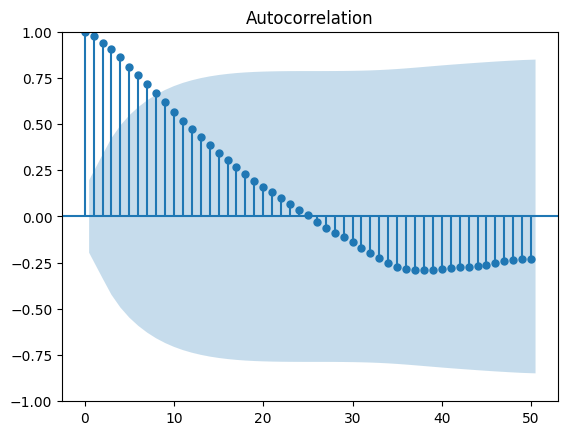

In [5]:
power = df['Wind Power [MW] (Net control)'].values[:100]

plot_acf(power, lags=50);

# TODO: autocorrelate decomposed data

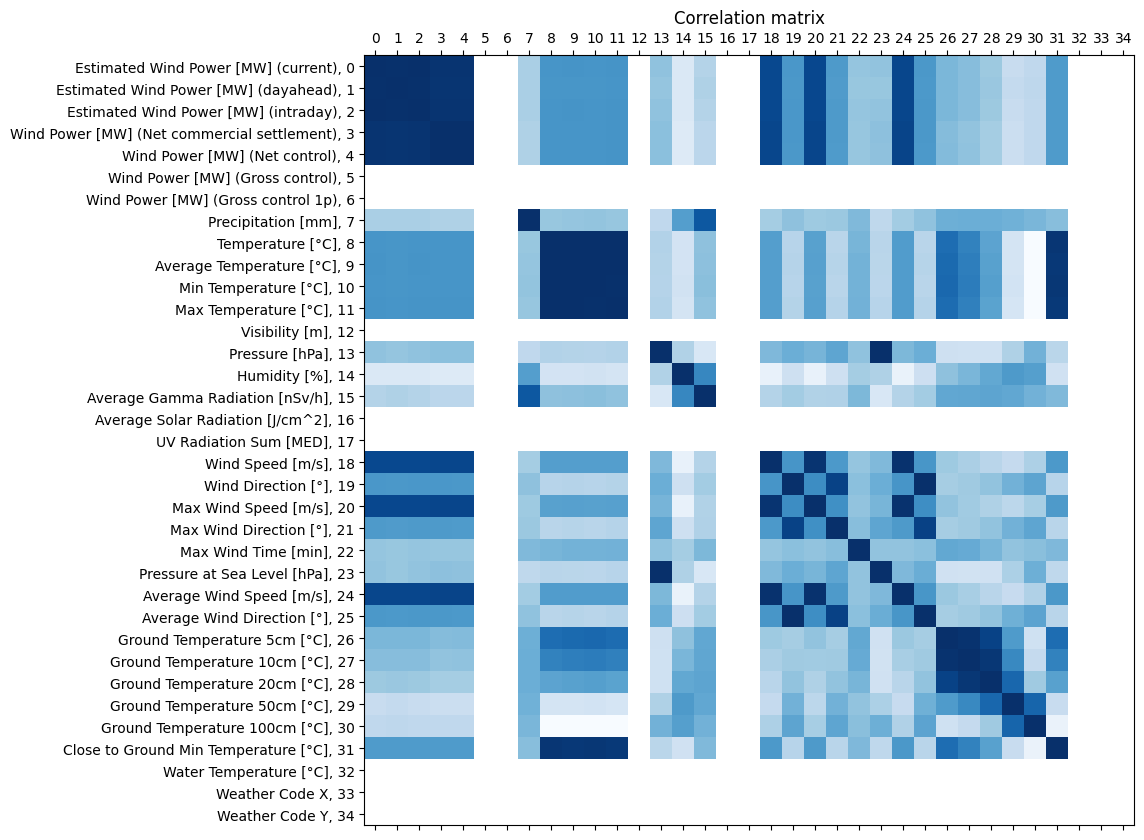

In [6]:
corr = df.corr().to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))

ax.matshow(corr, cmap=plt.cm.Blues)

ax.set_yticks(np.arange(corr.shape[0]))
ax.set_xticks(np.arange(corr.shape[0]))
ax.set_yticklabels([f'{label}, {idx}' for idx, label in enumerate(df.columns)])
ax.set_xticklabels([i for i in range(len(df.columns))])

ax.set_title('Correlation matrix')
plt.show()

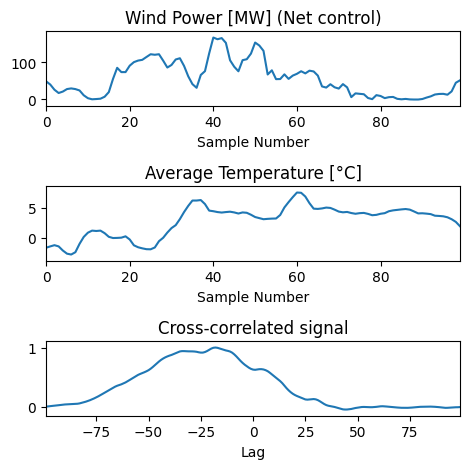

In [76]:
col = 'Average Temperature [°C]'


sig_len = 100
target = df['Wind Power [MW] (Net control)'].values[:sig_len]
param = df[col].values[:sig_len]

corr = sp.signal.correlate(target, param)
lags = sp.signal.correlation_lags(sig_len, sig_len)
corr /= np.max(corr)

fig, (ax_target, ax_param, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_target.plot(target)
ax_target.set_title('Wind Power [MW] (Net control)')
ax_target.set_xlabel('Sample Number')
ax_param.plot(param)
ax_param.set_title(col)
ax_param.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_target.margins(0, 0.1)
ax_param.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [80]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['Wind Power [MW] (Net control)', 'Average Temperature [°C]']], maxlag=[24]);



Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.7719  , p=0.0127  , df_denom=927, df_num=24
ssr based chi2 test:   chi2=44.7746 , p=0.0062  , df=24
likelihood ratio test: chi2=43.7779 , p=0.0081  , df=24
parameter F test:         F=1.7719  , p=0.0127  , df_denom=927, df_num=24
